### Imports

In [57]:
import os
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
hs_blau = "#22376f"
#mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#0645ad", "#800020", "#1EB9E7", ])

### Einlesen der Daten

In [58]:
bevölkerung = pd.read_excel(f"Data\\12411-0012_complete.xlsx", index_col=0)

#read sterbefälle pro monat
sterbefälle_monat = pd.read_excel(f"Data\\sonderauswertung-sterbefaelle_inkl_2021.xlsx", sheet_name='D_2016-2022_Monate_AG_Ins') #Datensatz ist selbst zusammengebaut
sterbefälle_monat = sterbefälle_monat[sterbefälle_monat.columns].replace(["-",".","X "],0)
sterbefälle_monat

,Nr.,Jahr,Alter,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,November,Dezember,Insgesamt
0,1,2022,Insgesamt,89092,82355,93048,85188,80035,0,0,0,0,0,0,0,429718
1,2,2022,0-15,265,265,275,248,241,0,0,0,0,0,0,0,1294
2,3,2022,15-30,342,295,358,301,319,0,0,0,0,0,0,0,1615
3,4,2022,30-35,234,192,231,243,200,0,0,0,0,0,0,0,1100
4,5,2022,35-40,357,351,345,348,334,0,0,0,0,0,0,0,1735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,387,2000,75-80,12695,11668,10979,10282,10020,9795,9784,9956,9537,10346,10313,10911,126286
387,388,2000,80-85,10350,9692,8954,8351,8124,7919,8018,7948,7977,8702,8806,9370,104211
388,389,2000,85-90,15951,14812,13574,12355,11838,11343,11402,11365,11133,11863,12123,12829,150588
389,390,2000,90-95,9386,8742,7715,7130,6838,6863,6655,6894,6652,7409,7617,8126,90027


### Altersgruppen 90-95 und 95+ zu 90+ zusammenfassen

Im folgenden Abschnit werden die Altersgruppen von den über 90 Jährigen zusammengefasst, so dass die Tabelle die gleichen Altergruppen wie die verwendete Standardbevölkerung aufweist.

In [59]:
#Sterbefälle einteilen
#bildet summe aus gruppe 90-95 und gruppe ü 95, ersetzt die 90-95 row damit, benennt sie um und dropt die ü95 reihe.
new_row = (sterbefälle_monat.loc[sterbefälle_monat["Alter"]=="90-95"]) + (sterbefälle_monat.loc[sterbefälle_monat["Alter"]=="95 u. mehr"])
age_90_95 = sterbefälle_monat.loc[sterbefälle_monat["Alter"]=="90-95"]
mehr_95 = sterbefälle_monat.loc[sterbefälle_monat["Alter"]=="95 u. mehr"]

new_row = age_90_95.iloc[0,3:] + mehr_95.iloc[0,3:]
index_95 = list(age_90_95.index)
index_mehr = list(mehr_95.index)

for i in range (len(index_95)):
    new_row = age_90_95.iloc[i,3:] +mehr_95.iloc[i,3:]
    sterbefälle_monat.loc[index_95[i], "Januar":] = new_row
    sterbefälle_monat.drop(index_mehr[i], inplace=True)


sterbefälle_monat['Alter'].replace({'90-95': '90<'}, inplace = True)
sterbefälle_monat = sterbefälle_monat.rename(columns={'Januar': 1,'Februar': 2,'März': 3,'April': 4,'Mai': 5,'Juni': 6,'Juli': 7,'August': 8,'September': 9,'Oktober': 10,'November': 11,'Dezember': 12})
sterbefälle_monat

,Nr.,Jahr,Alter,1,2,3,4,5,6,7,8,9,10,11,12,Insgesamt
0,1,2022,Insgesamt,89092,82355,93048,85188,80035,0,0,0,0,0,0,0,429718
1,2,2022,0-15,265,265,275,248,241,0,0,0,0,0,0,0,1294
2,3,2022,15-30,342,295,358,301,319,0,0,0,0,0,0,0,1615
3,4,2022,30-35,234,192,231,243,200,0,0,0,0,0,0,0,1100
4,5,2022,35-40,357,351,345,348,334,0,0,0,0,0,0,0,1735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,2000,70-75,9576,8819,8517,7974,7959,7688,7667,7973,7490,8283,7917,8572,98435
386,387,2000,75-80,12695,11668,10979,10282,10020,9795,9784,9956,9537,10346,10313,10911,126286
387,388,2000,80-85,10350,9692,8954,8351,8124,7919,8018,7948,7977,8702,8806,9370,104211
388,389,2000,85-90,15951,14812,13574,12355,11838,11343,11402,11365,11133,11863,12123,12829,150588


### Beispiel Jahr 2020

In [60]:
sterbefälle_monat.loc[sterbefälle_monat["Jahr"]==2021]


,Nr.,Jahr,Alter,1,2,3,4,5,6,7,8,9,10,11,12,Insgesamt
17,18,2021,Insgesamt,106579,82090,81801,81717,80818,76731,76613,76340,77774,84877,93561,102529,1021430
18,19,2021,0-15,296,222,290,260,310,303,290,308,299,319,306,287,3490
19,20,2021,15-30,291,276,295,333,328,387,362,312,343,362,319,343,3951
20,21,2021,30-35,236,184,243,230,216,205,242,229,241,238,213,235,2712
21,22,2021,35-40,328,298,365,340,392,360,305,356,386,382,314,400,4226
22,23,2021,40-45,527,474,526,525,547,501,480,491,479,516,569,612,6247
23,24,2021,45-50,900,772,867,825,869,791,840,789,787,808,857,904,10009
24,25,2021,50-55,1967,1703,1766,1875,1800,1652,1631,1646,1650,1724,1806,1970,21190
25,26,2021,55-60,3468,2908,3113,3301,3233,3091,3052,2996,2934,3228,3273,3600,38197
26,27,2021,60-65,4989,4293,4382,4513,4600,4320,4296,4220,4262,4531,4878,5420,54704


### Altersgruppen in 0-15, 15-30, 30-35, ..., 85-90, 90+ aufteilen

In [61]:
#alle Altersgruppen einteilen
rows = []
x = 0
j = 0
for k in range (1 ,33): 
    x=0
    for i in range(0, 92):
        k2 = k*91
        if i == 0 and k == 1:
            bevölkerungs_anzahl = bevölkerung.loc[bevölkerung.index[0]]["Gesamt"] #Gesamtbevölkerung je altersgruppe
        if i == 0 and k != 1:
            bevölkerungs_anzahl = bevölkerung.loc[bevölkerung.index[i+(k-1)*92]]["Gesamt"]
        else:
            bevölkerungs_anzahl = bevölkerung.loc[bevölkerung.index[i+((k-1)*92)]]["Gesamt"]

        if ( i < 15):
            x += bevölkerungs_anzahl
            if (i == 14):
                rows.append([1990+k-1,"0 - "+"<{}".format(i+1), x])
                x = 0   

        elif (i >= 15 and  i < 30):
    
            x += bevölkerungs_anzahl
            if i == 29:
                rows.append([1990+k-1,(str(i-14)+" - <"+str(i+1)), x])

            
                x = 0

        elif (i >= 30 and  i < 90):
            j += 1
            x += bevölkerungs_anzahl
            if j == 5:
                rows.append([1990+k-1,(str(i-4)+" - <"+str(i+1)), x])
                j = 0
                x = 0

        elif i == 90:
            x += bevölkerungs_anzahl
            rows.append([1990+k-1,"90=<", x])
            x = 0

        elif i == 91:
            x += bevölkerungs_anzahl
            rows.append([1990+k-1,"Gesamt", x])
            x=0
       
        

df_aufgeteilte_altersgruppen = pd.DataFrame(rows, columns=["Jahr","Alter", "Anzahl"])
df_aufgeteilte_altersgruppen

,Jahr,Alter,Anzahl
0,1990,0 - <15,12937503
1,1990,15 - <30,17692503
2,1990,30 - <35,6249072
3,1990,35 - <40,5651627
4,1990,40 - <45,5050480
...,...,...,...
507,2021,75 - <80,3183622
508,2021,80 - <85,3486211
509,2021,85 - <90,1779001
510,2021,90=<,846443


In [62]:
df_aufgeteilte_altersgruppen.loc[df_aufgeteilte_altersgruppen.Jahr == 2021]

,Jahr,Alter,Anzahl
496,2021,0 - <15,11606935
497,2021,15 - <30,13242236
498,2021,30 - <35,5553604
499,2021,35 - <40,5335194
500,2021,40 - <45,5132299
501,2021,45 - <50,4864404
502,2021,50 - <55,6225112
503,2021,55 - <60,6846797
504,2021,60 - <65,5994044
505,2021,65 - <70,4967930


### Standardbevölkerung auf 2021 festlegen

Für die Berechnung der Alterbereinigung muss eine Standardbevölkerung festgelegt werden. In unserem Fall verwenden wir die Bevölkerung aus dem Jahr 2021.

In [63]:
standard_bevölkerung = df_aufgeteilte_altersgruppen.loc[df_aufgeteilte_altersgruppen["Jahr"]==2021]
standard_bevölkerung

,Jahr,Alter,Anzahl
496,2021,0 - <15,11606935
497,2021,15 - <30,13242236
498,2021,30 - <35,5553604
499,2021,35 - <40,5335194
500,2021,40 - <45,5132299
501,2021,45 - <50,4864404
502,2021,50 - <55,6225112
503,2021,55 - <60,6846797
504,2021,60 - <65,5994044
505,2021,65 - <70,4967930


# Altersbereinigung


### Rohe Sterberate

In [64]:
#rohe sterberate
#loop über jahre
sterberaten_roh = []
for n in range(0,22):
    z = sterbefälle_monat.loc[(sterbefälle_monat["Jahr"]==2021-n)]
    sterberate_gesamt = 0

    # gesamt_bev = standard_bevölkerung.loc[standard_bevölkerung.index[15]][2]
    gesamt_bev = df_aufgeteilte_altersgruppen.loc[df_aufgeteilte_altersgruppen["Jahr"]==2021-n]["Anzahl"].reset_index(drop= True)

    #loop über altersgruppen
    for i in range(1,16):
        mri = ((z.loc[z.index[i]]["Insgesamt"]) / gesamt_bev[15]) * 100000  #sterberate je altersgruppe
        sterberate_gesamt += mri 


    sterberaten_roh.append([2021-n, sterberate_gesamt])
    sterberate_gesamt = 0

sterberaten_roh = pd.DataFrame(sterberaten_roh, columns=["Jahr", "Sterberate_Roh"])
sterberaten_roh

,Jahr,Sterberate_Roh
0,2021,1227.132739
1,2020,1185.222335
2,2019,1129.682765
3,2018,1150.184356
4,2017,1126.025519
5,2016,1103.830288
6,2015,1125.880498
7,2014,1069.436380
8,2013,1106.664697
9,2012,1079.907534


### Altersbereinigte Sterberate (Standardbevölkerung: 2021)


In [65]:
#altersbereinigt
sterberaten_bereinigt = []
#loop über jahre
for n in range(0,22):
    z = sterbefälle_monat.loc[(sterbefälle_monat["Jahr"]==2021-n)]
    q = df_aufgeteilte_altersgruppen.loc[df_aufgeteilte_altersgruppen["Jahr"]==2021-n]
    erg_sum = 0
    gesamt_bev = standard_bevölkerung.loc[standard_bevölkerung.index[15]][2]


    sum = 0
    #loop über Altersgruppen
    for i in range(0,15):

        asx = standard_bevölkerung.loc[standard_bevölkerung.index[i]][2] #bevölkerung je altersgruppe Standardbevölkerung
        bevölkerung_grp = q.loc[q.index[i]][2] #größe Bevölkerungsruppe untersuchte Bevölkerung
        subx = ((z.loc[z.index[i+1]]["Insgesamt"]) / bevölkerung_grp) * 100000 #sterberate je altersgruppe
        sum += (asx * subx)    

    erg = sum / gesamt_bev
    erg_sum += erg

    #print(2020-n, "Altersbereinigt:",erg_sum)
    sterberaten_bereinigt.append([2021-n, erg_sum])

sterberaten_bereinigt = pd.DataFrame(sterberaten_bereinigt, columns=["Jahr", "Sterberate_bereinigt"])
sterberaten_bereinigt

,Jahr,Sterberate_bereinigt
0,2021,1227.132739
1,2020,1198.826964
2,2019,1163.604358
3,2018,1212.913734
4,2017,1203.676103
5,2016,1195.205643
6,2015,1241.114547
7,2014,1189.145923
8,2013,1262.060694
9,2012,1250.213045


### Rohe vs. alteresbereinigte Sterblichkeit plotten

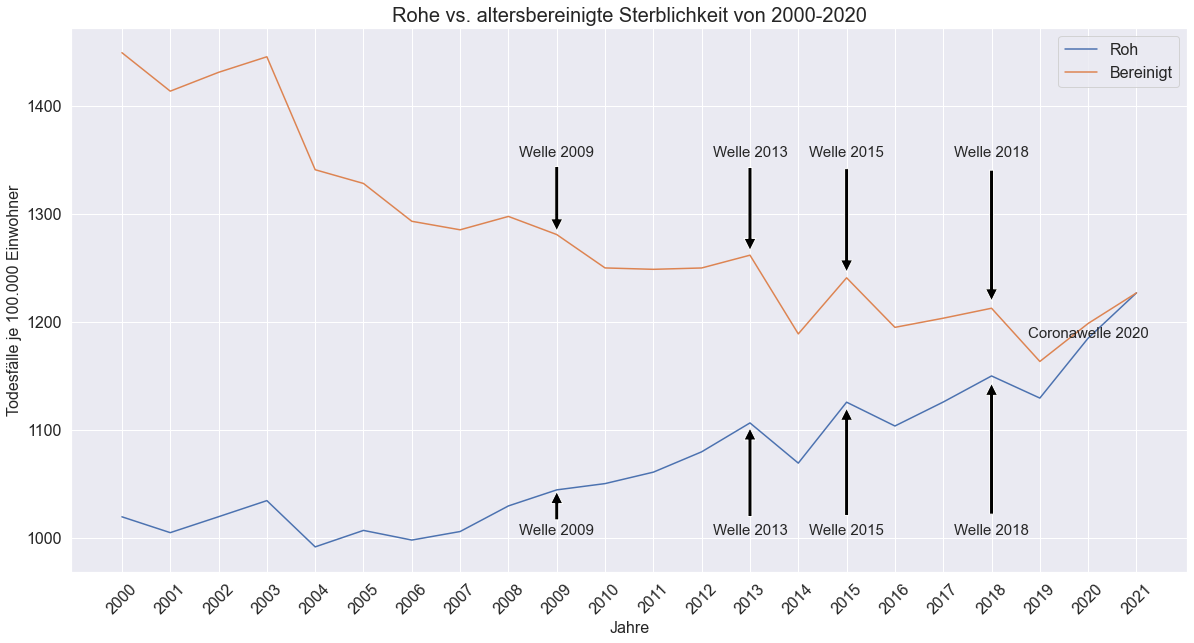

In [66]:
xticks = [i for i in range(2000,2022)]

ax = sns.lineplot(x="Jahr",  y='Sterberate_Roh', data=sterberaten_roh)
sns.lineplot(ax=ax, x="Jahr",  y='Sterberate_bereinigt', data=sterberaten_bereinigt)
plt.legend(labels=['Roh','Bereinigt'],fontsize= 16)
sns.set_theme(style="whitegrid")
plt.xticks(rotation=45)

# annotate lines
grippe_wellen = [2009,2013,2015,2018,2020]

for weave in grippe_wellen:
    sel_year_raw = sterberaten_roh.loc[sterberaten_roh["Jahr"] == weave]
    raw_year = sel_year_raw.Jahr
    raw_death = sel_year_raw.Sterberate_Roh

    sel_year_cleaned = sterberaten_bereinigt.loc[sterberaten_bereinigt["Jahr"] == weave]
    cleaned_year = sel_year_cleaned.Jahr
    cleaned_death = sel_year_cleaned.Sterberate_bereinigt
    if  weave == 2020:
     ax.annotate("Coronawelle " + str(weave), xy=(raw_year, raw_death),xycoords='data', size = 15,ha='center')
    else:
        ax.annotate("Welle "+str(weave), xy=(raw_year, raw_death), xycoords='data',xytext=(raw_year, 1000), size = 15,ha='center',arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom')

        ax.annotate("Welle " +str(weave), xy=(cleaned_year, cleaned_death),xycoords='data',xytext=(cleaned_year, 1350),size = 15, ha='center',arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom')

ax.set_ylabel("Todesfälle je 100.000 Einwohner", fontsize = 16)
ax.set_xlabel("Jahre", fontsize = 16)
ax.set_title("Rohe vs. altersbereinigte Sterblichkeit von 2000-2020",fontsize = 20)
plt.xticks(range(min(xticks), max(xticks)+1, 1), fontsize=16)
plt.yticks(fontsize=16)
# plt.ylabel("Sterberate je 100.000 Einwohner")
# plt.xticks(df_grippe_w.index, df_grippe_w["Alter"], rotation=45)
# plt.axis([0, 14, 0, 5000])
plt.gcf().set_size_inches(20, 10)

# Berechnung der Comparative Mortality Ratio

Beschreibung was der CMR aussagt und wofür dieser verwendet werden kann. 


In [67]:
cmr_df = pd.DataFrame(sterberaten_bereinigt, columns=["Jahr", "Sterberate_bereinigt"])
cmr_df["cmr"] = 0 # Damit Colum erzeugt wird
for i in range (len(cmr_df)):
    cmr_df["cmr"][i] = cmr_df["Sterberate_bereinigt"][i]/sterberaten_roh["Sterberate_Roh"][i]
cmr_df

C:\Users\mikes\AppData\Local\Temp\ipykernel_5544\2124987327.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmr_df["cmr"][i] = cmr_df["Sterberate_bereinigt"][i]/sterberaten_roh["Sterberate_Roh"][i]


,Jahr,Sterberate_bereinigt,cmr
0,2021,1227.132739,1.000000
1,2020,1198.826964,1.011479
2,2019,1163.604358,1.030028
3,2018,1212.913734,1.054539
4,2017,1203.676103,1.068960
5,2016,1195.205643,1.082780
6,2015,1241.114547,1.102350
7,2014,1189.145923,1.111937
8,2013,1262.060694,1.140418
9,2012,1250.213045,1.157704


### Verlauf CMR plotten

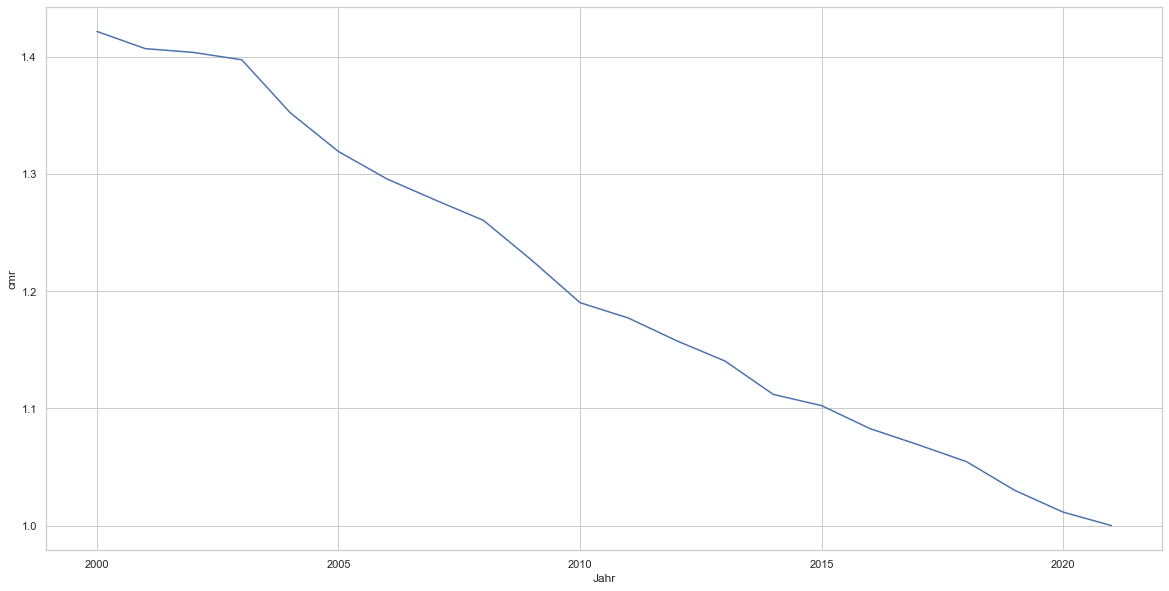

In [68]:
ax = sns.lineplot(x="Jahr",  y='cmr', data=cmr_df)
sns.set(font_scale=2)
plt.gcf().set_size_inches(20, 10)

### Trend von CMR berechnen

In [69]:
#Berechnung des Trendes
trend_area = cmr_df.loc[(cmr_df.Jahr >= 2017)]
trend_area = trend_area.sort_values(by="Jahr")
trend_area = trend_area.reset_index(drop=True)
trend_area

,Jahr,Sterberate_bereinigt,cmr
0,2017,1203.676103,1.068960
1,2018,1212.913734,1.054539
2,2019,1163.604358,1.030028
3,2020,1198.826964,1.011479
4,2021,1227.132739,1.000000


In [70]:
##Erstellen der Trendline
coeff = np.polyfit(trend_area.Jahr, trend_area.cmr ,1) # 1 = linear
m = coeff[0]
b = coeff[1]


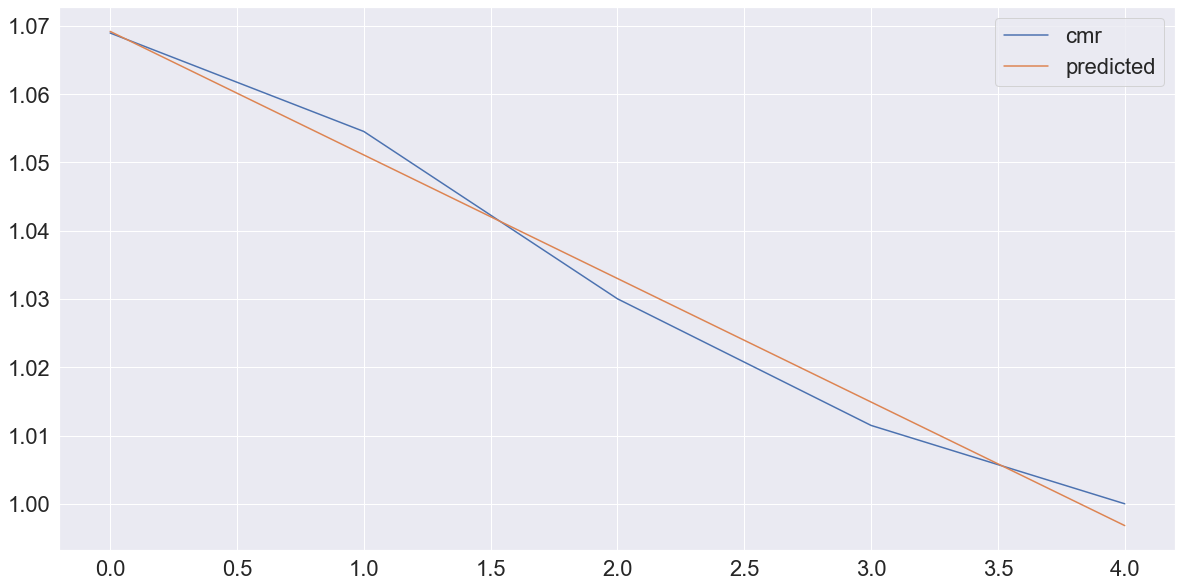

In [71]:
trend_area['predicted'] = pd.Series(np.polyval(coeff, trend_area.Jahr))
sns.set(font_scale=2)
trend_area[['cmr', 'predicted']].plot()
plt.gcf().set_size_inches(20, 10)

### Anhand von Trend CMR von 2021 bestimmen

In [72]:
cmr_df.loc[-1] = [2022, np.polyval(coeff, 2022)* cmr_df.loc[(cmr_df["Jahr"]==2021)]["Sterberate_bereinigt"][0], np.polyval(coeff, 2022)]  # adding a row
cmr_df.index = cmr_df.index + 1  # shifting index
cmr_df.sort_index(inplace=True)
cmr_df

,Jahr,Sterberate_bereinigt,cmr
0,2022.0,1201.003371,0.978707
1,2021.0,1227.132739,1.000000
2,2020.0,1198.826964,1.011479
3,2019.0,1163.604358,1.030028
4,2018.0,1212.913734,1.054539
5,2017.0,1203.676103,1.068960
6,2016.0,1195.205643,1.082780
7,2015.0,1241.114547,1.102350
8,2014.0,1189.145923,1.111937
9,2013.0,1262.060694,1.140418


In [73]:
# cmr_df.loc[-1] = [2021, np.polyval(coeff, 2021)* cmr_df.loc[(cmr_df["Jahr"]==2020)]["Sterberate_bereinigt"][0], np.polyval(coeff, 2021)]  # adding a row
# cmr_df.index = cmr_df.index + 1  # shifting index
# cmr_df.sort_index(inplace=True)
# cmr_df

### Verlauf CMR plotten

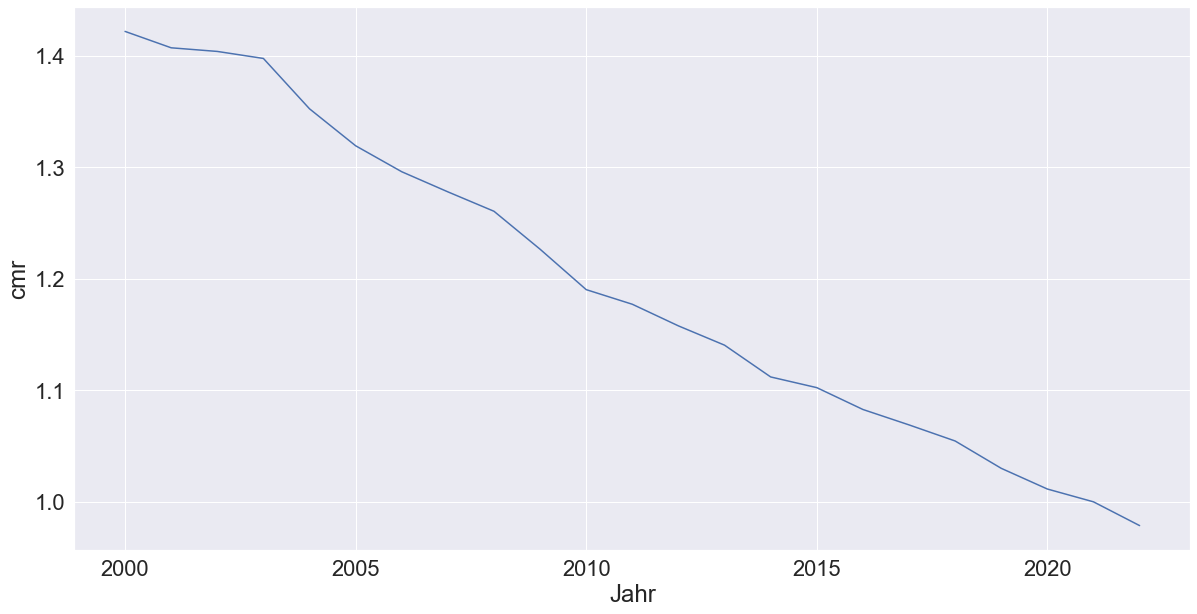

In [74]:
ax = sns.lineplot(x="Jahr",  y='cmr', data=cmr_df)
sns.set(font_scale=2)
plt.gcf().set_size_inches(20, 10)

# Berechnung des Erwartungswerts

In [75]:
#Gesamtbevölkerung je Jahr
df_gesamt_bev =  df_aufgeteilte_altersgruppen.loc[df_aufgeteilte_altersgruppen.Alter == "Gesamt"][["Jahr", "Anzahl"]]
df_gesamt_bev = df_gesamt_bev.loc[df_gesamt_bev.Jahr >1999].sort_values("Jahr",ascending=False).reset_index(drop= True)
df_gesamt_bev

,Jahr,Anzahl
0,2021,83237124
1,2020,83155031
2,2019,83166711
3,2018,83019213
4,2017,82792351
5,2016,82521653
6,2015,82175684
7,2014,81197537
8,2013,80767463
9,2012,80523746


In [76]:
#Todesfälle altersbereinigt und roh

sterberaten_bereinigt["Todesfälle_altersbereinigt"] = (sterberaten_bereinigt.Sterberate_bereinigt/100000) * df_gesamt_bev.Anzahl
sterberaten_bereinigt["Todesfälle_rohe"] = (sterberaten_roh.Sterberate_Roh/100000) * df_gesamt_bev.Anzahl
pd.options.display.float_format = '{:.10f}'.format
sterberaten_bereinigt

,Jahr,Sterberate_bereinigt,Todesfälle_altersbereinigt,Todesfälle_rohe
0,2021,1227.1327394733,1021430.0000000000,1021430.0000000000
1,2020,1198.8269641782,996884.9336987134,985572.0000000000
2,2019,1163.6043575041,967731.4731888575,939519.9999999999
3,2018,1212.9137337413,1006951.4361209510,954874.0000000000
4,2017,1203.6761025874,996551.7437572749,932262.9999999999
5,2016,1195.2056429261,986303.4532919356,910899.0000000000
6,2015,1241.1145473030,1019894.3684697307,925199.9999999999
7,2014,1189.1459234645,965557.2011891135,868356.0000000001
8,2013,1262.0606939066,1019334.4039885784,893825.0000000000
9,2012,1250.2130445074,1006718.3764179742,869582.0000000000


In [77]:
#Split in train und Test
lm_test_df = sterberaten_bereinigt.loc[(sterberaten_bereinigt["Jahr"] > 1999) & (sterberaten_bereinigt["Jahr"] < 2021 )]
lm_test_df

,Jahr,Sterberate_bereinigt,Todesfälle_altersbereinigt,Todesfälle_rohe
1,2020,1198.8269641782,996884.9336987134,985572.0000000000
2,2019,1163.6043575041,967731.4731888575,939519.9999999999
3,2018,1212.9137337413,1006951.4361209510,954874.0000000000
4,2017,1203.6761025874,996551.7437572749,932262.9999999999
5,2016,1195.2056429261,986303.4532919356,910899.0000000000
6,2015,1241.1145473030,1019894.3684697307,925199.9999999999
7,2014,1189.1459234645,965557.2011891135,868356.0000000001
8,2013,1262.0606939066,1019334.4039885784,893825.0000000000
9,2012,1250.2130445074,1006718.3764179742,869582.0000000000
10,2011,1248.9630016339,1003265.7509895163,852328.0000000000


In [78]:
#Datensatz aufbereiten
df = lm_test_df.copy()
df = df.sort_values('Jahr')
df = df.reset_index(drop= True)
df

,Jahr,Sterberate_bereinigt,Todesfälle_altersbereinigt,Todesfälle_rohe
0,2000,1449.6425490798,1192469.2925172888,838797.0000000000
1,2001,1414.0138432850,1165717.3817069363,828541.0000000000
2,2002,1431.4526421356,1181473.4865909882,841686.9999999999
3,2003,1445.8791656877,1193308.2360829359,853945.9999999999
4,2004,1341.2320477732,1106527.8264730081,818271.0000000001
5,2005,1328.4990055552,1095187.9437746529,830226.9999999999
6,2006,1293.4704382456,1064718.9753796144,821627.0000000000
7,2007,1285.5748824795,1056971.8613899145,827155.0000000000
8,2008,1297.9637378170,1064360.8450356382,844439.0000000000
9,2009,1281.1706018030,1048026.4682953132,854543.9999999999


### Erstellen der Trendlinie linear

In [79]:
##Erstellen der Trendline
coeff_2021_2 = np.polyfit(df.Jahr, df.Todesfälle_altersbereinigt ,1) # 1 = linear, 2 = x^2
m_2021_2 = coeff_2021_2[0]
b_2021_2 = coeff_2021_2[1]

### Erstellen der Trendlinie quadratisch

In [80]:
##Erstellen der Trendline
coeff_2021 = np.polyfit(df.Jahr, df.Todesfälle_altersbereinigt ,2) # 1 = linear, 2 = x^2
m_2021 = coeff_2021[0]
b_2021 = coeff_2021[1]


### Erstellen der Trendlinie polynom 3 Grades

In [81]:
coeff_2021_polynom_3 = np.polyfit(df.Jahr, df.Todesfälle_altersbereinigt ,3) # 1 = linear, 2 = x^2
m_2021_3 = coeff_2021_polynom_3[0]
b_2021_3 = coeff_2021_polynom_3[1]

### Erstellen der Trendlinie polynom 4 Grades

In [82]:
coeff_2021_polynom_4 = np.polyfit(df.Jahr, df.Todesfälle_altersbereinigt ,4) # 1 = linear, 2 = x^2
m_2021_4 = coeff_2021_polynom_4[0]
b_2021_4 = coeff_2021_polynom_4[1]

### Ermitteln des Bestimmtheitsmaß

In [83]:
werte_linear = pd.Series(np.polyval(coeff_2021_2, df.Jahr)).to_numpy()
werte_grad_2 = pd.Series(np.polyval(coeff_2021, df.Jahr)).to_numpy()
werte_grad_3 = pd.Series(np.polyval(coeff_2021_polynom_3, df.Jahr)).to_numpy()
werte_grad_4 = pd.Series(np.polyval(coeff_2021_polynom_4, df.Jahr)).to_numpy()

bestimmtheitsmas_linear = r2_score(df.Todesfälle_altersbereinigt,werte_linear)
bestimmtheitsmass_grad_2 = r2_score(df.Todesfälle_altersbereinigt,werte_grad_2)
bestimmtheitsmass_grad_3 = r2_score(df.Todesfälle_altersbereinigt,werte_grad_3)
bestimmtheitsmass_grad_4 = r2_score(df.Todesfälle_altersbereinigt,werte_grad_4)

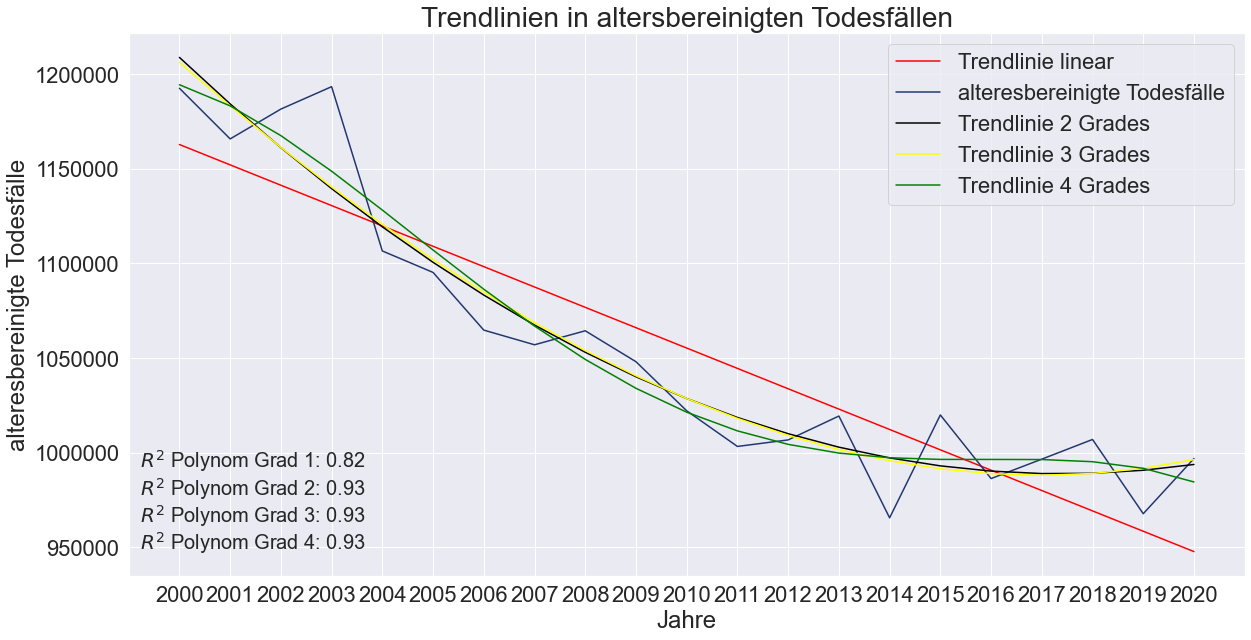

In [85]:



df['predicted'] = pd.Series(np.polyval(coeff_2021_2, df.Jahr))
df['predicted_2'] = pd.Series(np.polyval(coeff_2021, df.Jahr))
df['predicted_3'] = pd.Series(np.polyval(coeff_2021_polynom_3, df.Jahr))
df['predicted_4'] = pd.Series(np.polyval(coeff_2021_polynom_4, df.Jahr))
sns.set(font_scale=2)


ax = sns.lineplot(x="Jahr",  y='predicted', data=df, color ="red")
plot_linear = sns.lineplot(ax=ax, x="Jahr",  y='Todesfälle_altersbereinigt', data=df, color=hs_blau)
plot_linear2 = sns.lineplot(ax=plot_linear, x="Jahr",  y='predicted_2', data=df, color="black")
plot_linear3 = sns.lineplot(ax=plot_linear, x="Jahr",  y='predicted_3', data=df, color="yellow")
plot_linear4 = sns.lineplot(ax=plot_linear, x="Jahr",  y='predicted_4', data=df, color="green")

# plot_linear2.fill_between(x=df.Jahr,y1=df.predicted, y2=df.Todesfälle_altersbereinigt, where=(df.predicted > df.Todesfälle_altersbereinigt),color= "#22376f", alpha=0.9, interpolate=True)
# plot_linear2.fill_between(x=df.Jahr,y1=df.predicted, y2=df.Todesfälle_altersbereinigt, where=(df.predicted <= df.Todesfälle_altersbereinigt),color= "#df2020", alpha=0.9, interpolate=True)

plt.legend(labels=["Trendlinie linear", 'alteresbereinigte Todesfälle', 'Trendlinie 2 Grades','Trendlinie 3 Grades', 'Trendlinie 4 Grades'])
sns.set_theme(style="whitegrid")

plot_linear.axes.annotate(f"$R^2$ Polynom Grad 1: {bestimmtheitsmas_linear:.2f}", xy=(0.01,0.2), xycoords='axes fraction', fontsize = 20)
plot_linear.axes.annotate(f"$R^2$ Polynom Grad 2: {bestimmtheitsmass_grad_2:.2f}", xy=(0.01,0.15), xycoords='axes fraction', fontsize = 20)
plot_linear.axes.annotate(f"$R^2$ Polynom Grad 3: {bestimmtheitsmass_grad_3:.2f}", xy=(0.01,0.1), xycoords='axes fraction', fontsize = 20)
plot_linear.axes.annotate(f"$R^2$ Polynom Grad 4: {bestimmtheitsmass_grad_4:.2f}", xy=(0.01,0.05), xycoords='axes fraction', fontsize = 20)

plot_linear.set_title("Trendlinien in altersbereinigten Todesfällen", fontsize= 28)
plot_linear.ticklabel_format(axis="y", style="plain")
plot_linear.set_ylabel("alteresbereinigte Todesfälle")
plot_linear.set_xlabel("Jahre")
plt.xticks(range(2000, 2021, 1))

plt.gcf().set_size_inches(20, 10)



### Erwartungswert Tote 2021

In [86]:
pred_totesfaelle = np.polyval(coeff_2021, 2021)  # adding a row
pred_totesfaelle

998243.5883226395

### Erwartungswert Tote von 2000-2022

In [87]:
#Erwarteten Todesfälle
erwartungswerte = []

#bestimmen der erwarteten Toten von 2000 - 2010 anhand polyfit insgesamt
for idx2 in range(2000,2010,1):    
    erwartungswerte.append([idx2,np.polyval(coeff_2021, idx2)])

#bestimmen der erwarteten Toten von 2010 - 2021 anhand polyfit der letzten 10 jahre
for idx in range(1999,2010,1):
    
    temp_df = sterberaten_bereinigt.loc[(sterberaten_bereinigt["Jahr"] > idx) & (sterberaten_bereinigt["Jahr"] < idx+11)]
    coeff_temp = np.polyfit(temp_df.Jahr, temp_df.Todesfälle_altersbereinigt ,2) # 1 = linear
    m_temp = coeff_temp[0]
    b_temp = coeff_temp[1]
    erwartungswerte.append([idx+12,np.polyval(coeff_2021, idx+12)])

df_erwartungswerte = pd.DataFrame(erwartungswerte, columns=["Jahr", "Erwartete Todesfälle"])
df_erwartungswerte


,Jahr,Erwartete Todesfälle
0,2000,1208767.1981410980
1,2001,1184212.1649279594
2,2002,1161110.1416554451
3,2003,1139461.1283249855
4,2004,1119265.1249356270
5,2005,1100522.1314873695
6,2006,1083232.1479806900
7,2007,1067395.1744146347
8,2008,1053011.2107896805
9,2009,1040080.2571067810


In [88]:
df_2011_bis_2020 = sterberaten_bereinigt.loc[sterberaten_bereinigt.Jahr > 2000].sort_values("Jahr").reset_index(drop=True)
df_2011_bis_2020["Delta_erwartet_altersbereinigt"] = df_2011_bis_2020["Todesfälle_altersbereinigt"] - df_erwartungswerte["Erwartete Todesfälle"]
df_2011_bis_2020

,Jahr,Sterberate_bereinigt,Todesfälle_altersbereinigt,Todesfälle_rohe,Delta_erwartet_altersbereinigt
0,2001,1414.0138432850,1165717.3817069363,828541.0000000000,-43049.8164341617
1,2002,1431.4526421356,1181473.4865909882,841686.9999999999,-2738.6783369712
2,2003,1445.8791656877,1193308.2360829359,853945.9999999999,32198.0944274908
3,2004,1341.2320477732,1106527.8264730081,818271.0000000001,-32933.3018519774
4,2005,1328.4990055552,1095187.9437746529,830226.9999999999,-24077.1811609741
5,2006,1293.4704382456,1064718.9753796144,821627.0000000000,-35803.1561077551
6,2007,1285.5748824795,1056971.8613899145,827155.0000000000,-26260.2865907755
7,2008,1297.9637378170,1064360.8450356382,844439.0000000000,-3034.3293789965
8,2009,1281.1706018030,1048026.4682953132,854543.9999999999,-4984.7424943673
9,2010,1250.2531138596,1022101.9496351100,858768.0000000000,-17978.3074716710


### Mean und Standardabweichung

In [89]:
# mean sollte ~ 0 sein
mean_delta = df_2011_bis_2020.Delta_erwartet_altersbereinigt.mean()

#Standardabweichung
std_delta = df_2011_bis_2020.Delta_erwartet_altersbereinigt.std()


print(std_delta)

21973.195116716204


### Barplot über Todesfälle - Erwartete Todesfälle (Altersbereinigt)

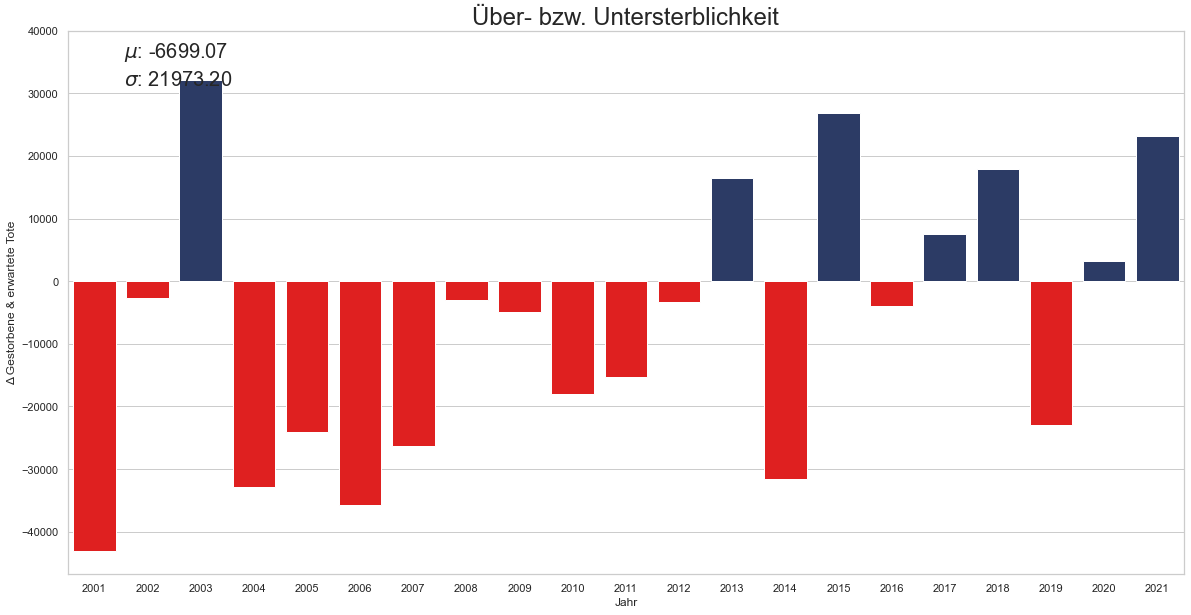

In [90]:
clrs = ['red' if y<=0 else hs_blau for y in df_2011_bis_2020.Delta_erwartet_altersbereinigt]
barplot_todesfaelle = sns.barplot(data = df_2011_bis_2020, x= "Jahr", y = "Delta_erwartet_altersbereinigt", palette=clrs)
sns.set(font_scale=2)


barplot_todesfaelle.axes.annotate(f"$\mu$: {mean_delta:.2f}", xy=(0.05,0.95), xycoords='axes fraction', fontsize = 20)
barplot_todesfaelle.axes.annotate(f"$\sigma$: {std_delta:.2f}", xy=(0.05,0.9), xycoords='axes fraction', fontsize = 20)

barplot_todesfaelle.set_ylabel("Δ Gestorbene & erwartete Tote")
barplot_todesfaelle.set_xlabel("Jahr")
barplot_todesfaelle.set_title("Über- bzw. Untersterblichkeit")
y1 = df_2011_bis_2020.Delta_erwartet_altersbereinigt
plt.yticks(range(-40000, 50000, 10000))


plt.gcf().set_size_inches(20, 10)


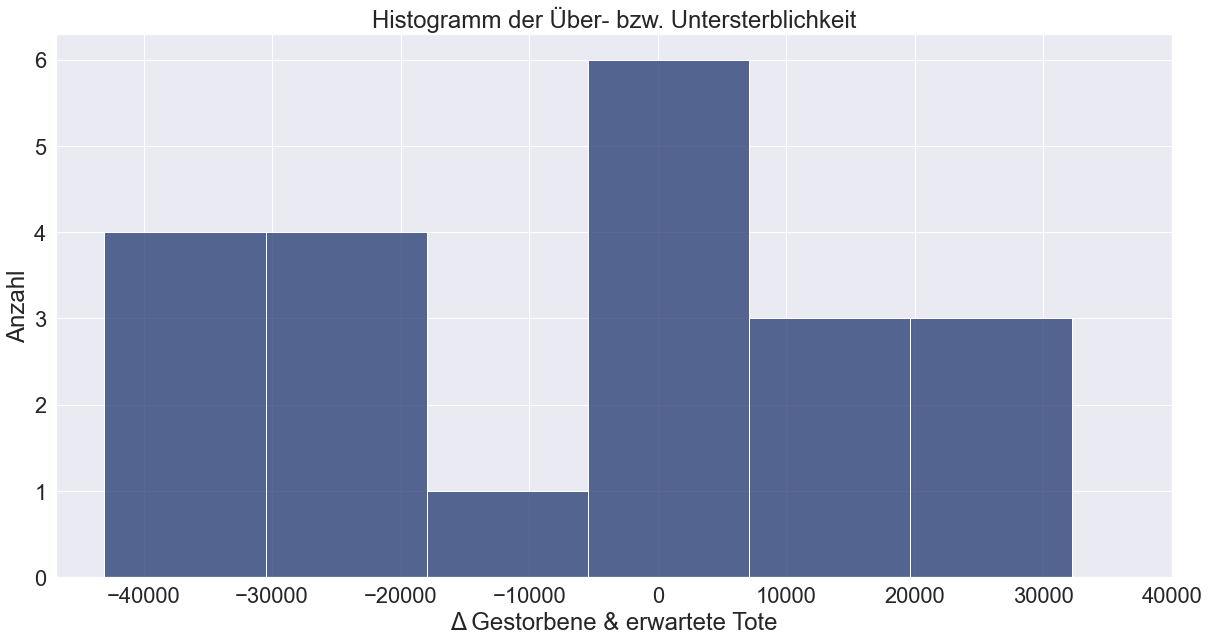

In [91]:
barplot_histo = sns.histplot(data=df_2011_bis_2020, x= "Delta_erwartet_altersbereinigt", color=hs_blau)
barplot_histo.set_ylabel("Anzahl")
barplot_histo.set_xlabel("Δ Gestorbene & erwartete Tote")
barplot_histo.set_title("Histogramm der Über- bzw. Untersterblichkeit")
plt.xticks(range(-40000, 50000, 10000))
plt.gcf().set_size_inches(20, 10)

### Save fig

In [93]:
barplot_todesfaelle = barplot_todesfaelle.get_figure()
barplot_todesfaelle.savefig("barplot_todesfaelle.png", dpi=200)

In [94]:
barplot_histo = barplot_histo.get_figure()
barplot_histo.savefig("barplot_histo.png", dpi=200)

In [95]:
plot_linear = plot_linear.get_figure()
plot_linear.savefig("plot_linear.png", dpi=200)

### Ranking Über- bzw. Untersterblichkeit 

In [92]:
df_2011_bis_2020_sorted  = df_2011_bis_2020.sort_values(by=["Delta_erwartet_altersbereinigt"])
df_2011_bis_2020_sorted = df_2011_bis_2020_sorted.reset_index(drop= True)
years_sorted_by_delta = df_2011_bis_2020_sorted["Jahr"].to_list()

In [98]:
df_2011_bis_2020

,Jahr,Sterberate_bereinigt,Todesfälle_altersbereinigt,Todesfälle_rohe,Delta_erwartet_altersbereinigt
0,2001,1414.0138432850,1165717.3817069363,828541.0000000000,-43049.8164341617
1,2002,1431.4526421356,1181473.4865909882,841686.9999999999,-2738.6783369712
2,2003,1445.8791656877,1193308.2360829359,853945.9999999999,32198.0944274908
3,2004,1341.2320477732,1106527.8264730081,818271.0000000001,-32933.3018519774
4,2005,1328.4990055552,1095187.9437746529,830226.9999999999,-24077.1811609741
5,2006,1293.4704382456,1064718.9753796144,821627.0000000000,-35803.1561077551
6,2007,1285.5748824795,1056971.8613899145,827155.0000000000,-26260.2865907755
7,2008,1297.9637378170,1064360.8450356382,844439.0000000000,-3034.3293789965
8,2009,1281.1706018030,1048026.4682953132,854543.9999999999,-4984.7424943673
9,2010,1250.2531138596,1022101.9496351100,858768.0000000000,-17978.3074716710


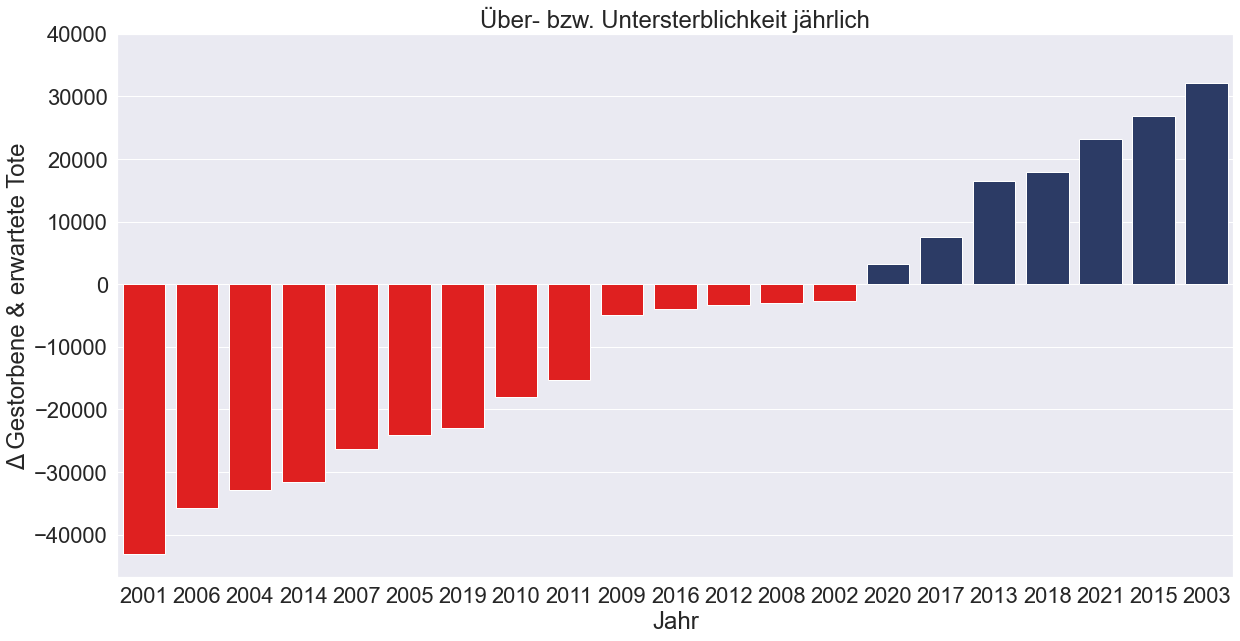

In [96]:
clrs = ['red' if y<=0 else hs_blau for y in df_2011_bis_2020_sorted.Delta_erwartet_altersbereinigt]


barplot_todesfaelle_sorted = sns.barplot(data = df_2011_bis_2020_sorted, x= df_2011_bis_2020_sorted.Jahr, y = df_2011_bis_2020_sorted.Delta_erwartet_altersbereinigt, order = years_sorted_by_delta, palette=clrs)
sns.set(font_scale=2)



barplot_todesfaelle_sorted.set_ylabel("Δ Gestorbene & erwartete Tote")
barplot_todesfaelle_sorted.set_xlabel("Jahr")
barplot_todesfaelle_sorted.set_title("Über- bzw. Untersterblichkeit jährlich")

plt.yticks(range(-40000, 50000, 10000))



plt.gcf().set_size_inches(20, 10)

In [99]:
barplot_todesfaelle_sorted = barplot_todesfaelle_sorted.get_figure()
barplot_todesfaelle_sorted.savefig("plot_linear.png", dpi=200)